# LOGISTIC REGRESSION PROBLEM
pima Indian Diabetes

# 1)Import the required Libraries and DataSet

In [1]:
import pandas as pd#To handle dataSets (or Series or Frames)

import numpy as np#For scientific calculations

#To visualize our dataset we use both seaborn and Matplotlib|
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)


#from scipy import stats
#from scipy.stats import normimport matplotlib.pyplot as plt



In [2]:
#loading the required dataSet
pima = pd.read_csv("diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#rows and columns
pima.shape

(768, 9)

In [5]:
count= pima.groupby('Outcome').size()
print(count)

#event rate =(# of possitive outcomes)/(# of negative outcomes)
268/768

Outcome
0    500
1    268
dtype: int64


0.3489583333333333

In [6]:
from pandas import set_option
set_option('display.width',100)#sets max width to 800px, per column.
set_option('precision',3)#number of significant digits

#Correlation
correlation=pima.corr(method='pearson')
print(correlation)

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074  0.018   
Glucose                         0.129    1.000          0.153          0.057    0.331  0.221   
BloodPressure                   0.141    0.153          1.000          0.207    0.089  0.282   
SkinThickness                  -0.082    0.057          0.207          1.000    0.437  0.393   
Insulin                        -0.074    0.331          0.089          0.437    1.000  0.198   
BMI                             0.018    0.221          0.282          0.393    0.198  1.000   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184    0.185  0.141   
Age                             0.544    0.264          0.240         -0.114   -0.042  0.036   
Outcome                         0.222    0.467          0.065          0.075    0.131  0.293   

                          DiabetesPedig

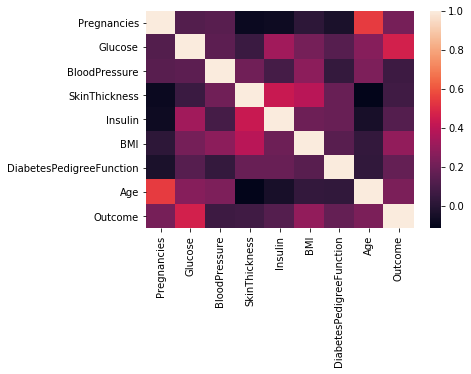

In [7]:
#correlation or heatmap we can use bcz both are same
sns.heatmap(correlation)

In [8]:
#skewness of the graph(left or right orientation..?)

skew=pima.skew()
print(skew)

Pregnancies                 0.902
Glucose                     0.174
BloodPressure              -1.844
SkinThickness               0.109
Insulin                     2.272
BMI                        -0.429
DiabetesPedigreeFunction    1.920
Age                         1.130
Outcome                     0.635
dtype: float64


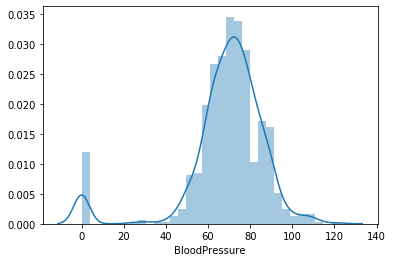

In [9]:
#Distribution of the target variable(i.e.., Outcome)

#sns.distplot(pima['Outcome'])
#sns.distplot(pima['Pregnancies'])
#sns.distplot(pima['Glucose']) ;#left skewed
sns.distplot(pima['BloodPressure']);#left skewed because of negative value


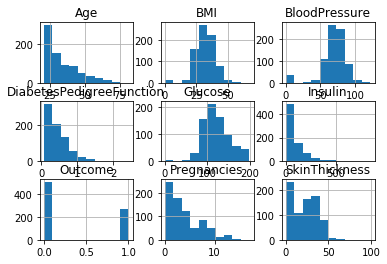

In [10]:
#histogram to check skewness for complete dataset
pima.hist()
plt.show()

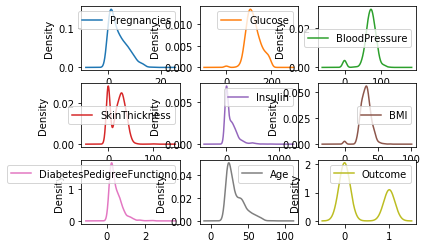

In [11]:
#density plot
pima.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.show()

# Data Preprocessing

In [12]:
#check that whether it is needed or not
#Normalization technique
#Q)Is Normalization needed for linear regression 
#      (Answer: Normalization is not required for Linear Regression and why..?)


# MinMax Scaler

In [13]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array=pima.values#convert DataFrame to nD-Array
X=array[:,0:-1]#all rows(:) and 1st to last column(Excluding)
y=array[:,-1]#only last column as output
scaler= MinMaxScaler(feature_range=(0,1))#Normalizing the data with minimum value as 0 and maximum value as 1

#Splitting the data into training,testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
#print('Input selected features: ',X)
#print('Output required feature: ',y)


(576, 8) (192, 8) (576,) (192,)


In [14]:
#New data of X
rescaledX=scaler.fit_transform(x_train)#fitting and transforming the data X into a resclaed_X
rescaled_validx= scaler.transform(x_test)#Transforming the X_test data

#Summerize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[0.529 0.449 0.508 0.    0.    0.335 0.027 0.2  ]
 [0.059 0.596 0.475 0.364 0.111 0.496 0.078 0.033]
 [0.    0.46  0.656 0.    0.    0.483 0.223 0.1  ]
 [0.706 0.707 0.672 0.434 0.384 0.584 0.192 0.617]
 [0.529 0.732 0.656 0.465 0.154 0.565 0.239 0.317]]


# Cross Validation to verify the given data

In [15]:
#Logistic Regression is a Linear Algorithm (Linear plane seperates the data)

# Logistic Regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()
#logreg.fit(X,y_train);#case:1
logreg.fit(rescaledX,y_train)#case:2


C:\Users\Lalith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#Make class predictions for the testing set
y_pred_class = logreg.predict(rescaled_validx)

In [17]:
y_pred_class

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [18]:
#Calculate the accuracy
from sklearn import metrics
cross_validation = metrics.accuracy_score(y_test,y_pred_class)
print(cross_validation)

0.7916666666666666


In [19]:
'''Accuracy with fitting rescaledX(trainX & testX),
X_train,
rescaledX(trainX done fit_transform and testX done with transform)'''


'Accuracy with fitting rescaledX(trainX & testX),\nX_train,\nrescaledX(trainX done fit_transform and testX done with transform)'

# 3)Normalizer


In [20]:
from sklearn.preprocessing import Normalizer
array = pima.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


# 4)Chi-square test 

In [21]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
array = pima.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)#chi-squared (chi2) statistical test for non-negative features to select 4 of the bestfeatures from the Pima Indians onset of diabetes dataset.
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


# 5)RFE

In [22]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = pima.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking: ",fit.ranking_)

Num Features:  3
Selected Features: [ True False False False False  True  True False]
Feature Ranking:  [1 2 3 5 6 1 1 4]


C:\Users\Lalith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lalith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lalith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lalith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lalith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

# 6)PCA

In [23]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
array = pima.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: ",fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance:  [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


# 7)Gini

In [24]:
#Decision tree classifier with criterion gini index
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
clf_gini= DecisionTreeClassifier(criterion ="gini",random_state=100,max_depth =3,min_samples_leaf=5)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

# 8)Entropy

In [25]:
#Decsion tree clasifier with crietrion info gain
clf_entropy= DecisionTreeClassifier(criterion ="entropy",random_state=100,max_depth =3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [26]:
# make class predictions for the testing set
y_pred_class = clf_gini.predict(x_test)

In [27]:
total_length=y_pred_class.shape[0]
total_length
print(metrics.accuracy_score(y_test, y_pred_class))

0.734375


In [28]:
count=0

for i in range(len(y_pred_class)):
    if y_test[i] == y_pred_class[i]:
        count=count+1
print("Accuracy = ",count/total_length)
print ("Accuracy is ", accuracy_score(y_test,y_pred_class)*100)

Accuracy =  0.734375


NameError: name 'accuracy_score' is not defined

In [ ]:
y_pred_class = clf_entropy.predict(x_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred_class)*100)

In [ ]:
#for gini
gini=clf_gini.feature_importances_
print(clf_gini.feature_importances_)

In [ ]:
#for entropy
entropy=list(clf_entropy.feature_importances_)
print(clf_entropy.feature_importances_)
col=pima.columns[0:8]
print(col)
len(entropy)

In [ ]:
data = {'features': list(col), 'Accuracy': entropy } 
#list(entropy),)'list(gini)'
  
# Create DataFrame 
df = pd.DataFrame(data)
df.head()


In [ ]:
#plot input features with entropy 
plt.plot(col,entropy)
plt.ylabel('Diabates')
plt.show()

# 9)Extra Tree Classifier

In [ ]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
array = pima.values
X = array[:,:-1]
Y = array[:,-1]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)

In [ ]:
#To know which feature is more important here(which has high score values)
print(pima.feature_importances_)

In [ ]:
pima.describe()

In [ ]:
featured_column=['Pregnancies','BMI','Age','BloodPressure']#because these has more score values
x=pima[featured_column]#We will take only this columns to decide whther the person is diabetic or not
y=pima['Outcome']#This will be the final answer
 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
#x_train.shape
#x_test.shape
#y_train.shape
#y_test.shape

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
#description is homework

In [ ]:
# make class predictions for the testing set
y_pred_class = logreg.predict(x_test)
y_pred_class

In [ ]:
#Calculate the accuracy using Extra Tree Classifier
from sklearn import metrics
print('Accuracy using Extra Tree Classifier is:',metrics.accuracy_score(y_test, y_pred_class)*100)

# Predict Probabilties for patient has diabetes or not..!

In [6]:
#predict_proba()
from sklearn.tree import DecisionTreeRegressor

logi=logistic_model.predict_proba[:1] 
#print('Acuracy is ',.format(clf_entropy.predict_proba(rescaledX[:20])))
print(logi)

NameError: name 'logistic_model' is not defined